### Import the libraries

In [705]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from math import ceil
from scipy import stats

from sklearn import preprocessing
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, RobustScaler, LabelEncoder
from math import ceil
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LassoCV, RidgeCV, LogisticRegression, LinearRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier


### Import the excel files 

In [706]:
data=pd.read_csv(r'C:\Users\Antonio\Desktop\BC2_predicting_cancellations\H2.csv')

### Understand the data

In [707]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [708]:
data.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


In [709]:
# Define metric and non-metric features
non_metric_features = ['IsCanceled','ArrivalDateYear','ArrivalDateMonth','ArrivalDateWeekNumber','ArrivalDateDayOfMonth','Meal','Country','MarketSegment','DistributionChannel','IsRepeatedGuest','ReservedRoomType','AssignedRoomType','DepositType','Company','Agent','CustomerType','ReservationStatus','ReservationStatusDate']
metric_features = data.columns.drop(non_metric_features).to_list()
# C

In [710]:
data

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.00,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,August,35,30,2,5,2,0.0,...,No Deposit,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06
79326,0,102,2017,August,35,31,2,5,3,0.0,...,No Deposit,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07
79327,0,34,2017,August,35,31,2,5,2,0.0,...,No Deposit,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07
79328,0,109,2017,August,35,31,2,5,2,0.0,...,No Deposit,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [711]:
# Summary statistics for all variables
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
IsCanceled,79330.0,NaN,NaN,NaN,0.417270,0.493111,0.0,0.0,0.0,1.0,1.0
LeadTime,79330.0,NaN,NaN,NaN,109.735724,110.948526,0.0,23.0,74.0,163.0,629.0
ArrivalDateYear,79330.0,NaN,NaN,NaN,2016.174285,0.699181,2015.0,2016.0,2016.0,2017.0,2017.0
ArrivalDateMonth,79330,12,August,8983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ArrivalDateWeekNumber,79330.0,NaN,NaN,NaN,27.177449,13.398523,1.0,17.0,27.0,38.0,53.0
ArrivalDateDayOfMonth,79330.0,NaN,NaN,NaN,15.786625,8.728451,1.0,8.0,16.0,23.0,31.0
StaysInWeekendNights,79330.0,NaN,NaN,NaN,0.795185,0.885026,0.0,0.0,1.0,2.0,16.0
StaysInWeekNights,79330.0,NaN,NaN,NaN,2.182957,1.456416,0.0,1.0,2.0,3.0,41.0
Adults,79330.0,NaN,NaN,NaN,1.850977,0.509292,0.0,2.0,2.0,2.0,4.0
Children,79326.0,NaN,NaN,NaN,0.091370,0.372177,0.0,0.0,0.0,0.0,3.0


In [712]:
# Check missing values
data.isnull().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [713]:
# Check duplicated observations
data[data.duplicated()]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
9,1,62,2015,July,27,2,2,3,2,0.0,...,No Deposit,8,NULL,0,Transient,76.50,0,1,No-Show,2015-07-02
12,0,43,2015,July,27,3,0,2,2,0.0,...,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
17,0,43,2015,July,27,3,0,2,2,0.0,...,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
18,0,43,2015,July,27,3,0,2,2,0.0,...,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
22,0,43,2015,July,27,3,0,2,2,0.0,...,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79289,0,186,2017,August,35,31,0,3,2,0.0,...,No Deposit,9,NULL,0,Transient,126.00,0,2,Check-Out,2017-09-03
79292,0,63,2017,August,35,31,0,3,3,0.0,...,No Deposit,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
79293,0,63,2017,August,35,31,0,3,3,0.0,...,No Deposit,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
79294,0,63,2017,August,35,31,0,3,3,0.0,...,No Deposit,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


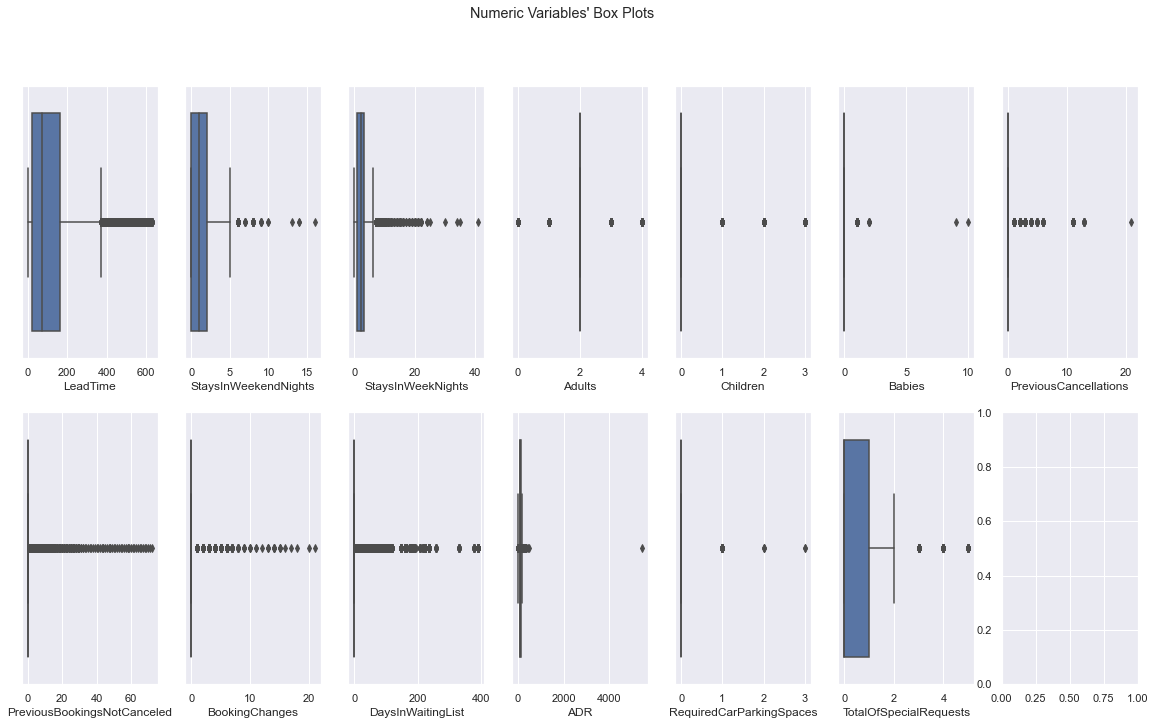

In [714]:
# All Numeric Variables' Box Plots in one figure
sns.set()
# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))
# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=data[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"
plt.suptitle(title)
plt.show()

In [715]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric_features):
    sns.histplot(x=data[feat], hue=data['IsCanceled'], stat='density', common_norm=False, ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms by Target"
plt.suptitle(title)
plt.subplots_adjust(wspace=0.4)

plt.show()

KeyboardInterrupt: 

In [ ]:
# Pairwise Relationship of Numerical Variables
sns.set()
features = metric_features + ['IsCanceled']

# Setting pairplot
sns.pairplot(data=data[features], hue='IsCanceled', diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables by Target", fontsize=20)

plt.show()

In [ ]:
# All Non-Metric/ Low Cardinality Variables' Absolute Frequencies
sns.set()

features = non_metric_features 
# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(3, ceil(len(features) / 3), figsize=(21, 17))

# Plot data
# Iterate across axes objects and associate each bar plot:
for ax, feat in zip(axes.flatten(), features):
    sns.countplot(x=data[feat], ax=ax)

title = "Categorical/Low Cardinality Variables' Absolute Frequencies"
plt.suptitle(title)
# Rotating X-axis labels
axes.flatten()[0].tick_params(axis='x', labelrotation = 90)
axes.flatten()[2].tick_params(axis='x', labelrotation = 90)
plt.subplots_adjust(wspace=0.3, hspace=0.7)

plt.show()

In [ ]:
# All Non-Metric/ Low Cardinality Variables' Relative Frequencies by Target
sns.set()

features = non_metric_features 
features.remove('IsCanceled')
# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(3, ceil(len(features) / 3), figsize=(21, 17))

# Plot data
# Iterate across axes objects and associate each bar plot:
for ax, feat in zip(axes.flatten(), features):
    datag = data.groupby(['IsCanceled'])[feat].value_counts(normalize=True).rename('prop').reset_index()
    sns.barplot(data=datag, x=feat, y='prop', hue='IsCanceled', ax=ax)

title = "Categorical/Low Cardinality Variables' Relative Frequencies by Target"
plt.suptitle(title)
# Rotating X-axis labels
axes.flatten()[0].tick_params(axis='x', labelrotation = 90)
axes.flatten()[2].tick_params(axis='x', labelrotation = 90)
axes.flatten()[-1].remove()
plt.subplots_adjust(wspace=0.3, hspace=0.7)

plt.show()

In [ ]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(data[metric_features].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Pearson Correlation Matrix", fontsize=20)

plt.show()

# Data Preparation

### Feature Engineering 

In [716]:
data_FE=data.copy()

In [717]:
#creation of a changeroomtype
data_FE['changeroomtype'] = data_FE['AssignedRoomType'] != data_FE['ReservedRoomType']
data_FE['changeroomtype'] = data_FE['changeroomtype'].replace({True:1, False:0})

In [718]:
#creation of ADR
data_FE['ADRpp']=data_FE['ADR']/(data_FE['Adults']+data_FE['Children'])

In [719]:
#creation total number of previorus bookings 
data_FE['PreviousBookings']=data_FE['PreviousBookingsNotCanceled']+data_FE['PreviousCancellations']

In [720]:
#total number of days that were reserved
data_FE['totaldaysreserved']= data_FE['StaysInWeekendNights']+data_FE['StaysInWeekNights']

In [721]:
#children+babies per adult
data_FE['kidsperadult']=data_FE['Children']+data_FE['Babies']

In [722]:
#reservationstatusdate-separate by 3 columns- day,month,year
new = data_FE["ReservationStatusDate"].str.split("-", n = 2, expand = True) 
data_FE['ReservationStatusYEAR']= new[0]
data_FE['ReservationStatusMONTH']= new[1]
data_FE['ReservationStatusDAY']= new[2]
del data_FE['ReservationStatusDate']

#### Analysis of the metric variables

In [723]:
#With feature engineering, the team came up with an additional 5 metric variables.Therefore, they also have to be analyzed.
metric_features = ['LeadTime','StaysInWeekendNights','StaysInWeekNights','Adults','Children','Babies','PreviousCancellations','PreviousBookingsNotCanceled','BookingChanges','DaysInWaitingList','ADR','TotalOfSpecialRequests','ADRpp','PreviousBookings','totaldaysreserved','kidsperadult']

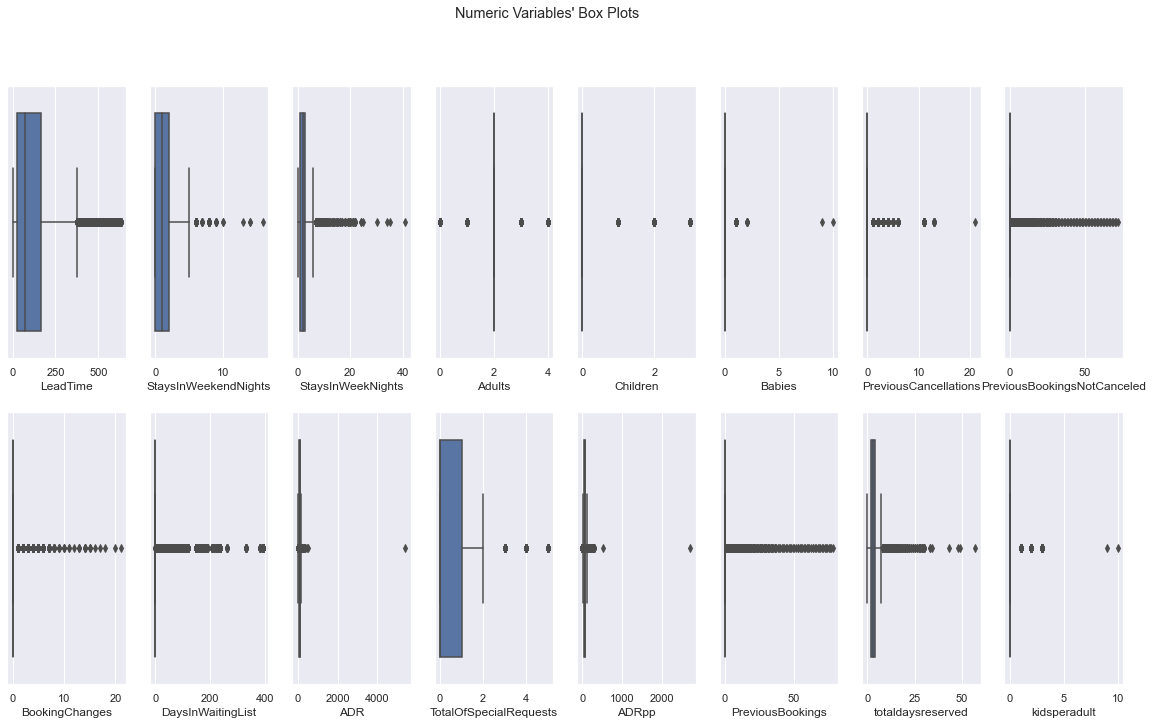

In [724]:
#boxplot
# All Numeric Variables' Box Plots in one figure
sns.set()
# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))
# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=data_FE[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"
plt.suptitle(title)
plt.show()

### Select data

In [725]:
#drop duplicates 
data_FE.drop_duplicates(inplace=True)
#drop DepositType
#data=data.drop(['DepositType'],axis=1)
del data_FE['DepositType']
#drop reservations with no adults nor children
data_FE.drop(data_FE[(data_FE['Adults']==0) & (data_FE['Children']==0)].index, inplace = True)

### Clean Data

In [726]:
data_clean=data_FE

### NaN values 

In [727]:
#erase from the dataset the observations that contain nan values 
data_clean=data_clean.dropna(axis=0)

#### 'Null' values 

In [728]:
 data_clean[data_clean=='       NULL'].count()

IsCanceled                         0
LeadTime                           0
ArrivalDateYear                    0
ArrivalDateMonth                   0
ArrivalDateWeekNumber              0
ArrivalDateDayOfMonth              0
StaysInWeekendNights               0
StaysInWeekNights                  0
Adults                             0
Children                           0
Babies                             0
Meal                               0
Country                            0
MarketSegment                      0
DistributionChannel                0
IsRepeatedGuest                    0
PreviousCancellations              0
PreviousBookingsNotCanceled        0
ReservedRoomType                   0
AssignedRoomType                   0
BookingChanges                     0
Agent                           5541
Company                        50502
DaysInWaitingList                  0
CustomerType                       0
ADR                                0
RequiredCarParkingSpaces           0
T

In [729]:
# Most of the values in 'Company' are 'NULL'.Therefore,to simplify our analysis we will change the value 'null' to 1 and the rest to 0.
data_clean.loc[data_clean['Company'] != '       NULL', 'Company'] = 0
data_clean.loc[data_clean['Company'] == '       NULL', 'Company'] = 1

C:\Users\Antonio\Anaconda3\envs\classdatamining\lib\site-packages\pandas\core\indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


#### Encode categorical variables 

In [730]:
#Updating the non_metric_features by adding the new features 
non_metric_features = ['IsCanceled','ArrivalDateYear','ArrivalDateMonth','ArrivalDateWeekNumber','ArrivalDateDayOfMonth','Meal','Country','MarketSegment','DistributionChannel','IsRepeatedGuest','ReservedRoomType','AssignedRoomType','Company','Agent','CustomerType','ReservationStatus','changeroomtype','ReservationStatusYEAR','ReservationStatusMONTH','ReservationStatusDAY']
data_clean[non_metric_features]

,IsCanceled,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,ReservedRoomType,AssignedRoomType,Company,Agent,CustomerType,ReservationStatus,changeroomtype,ReservationStatusYEAR,ReservationStatusMONTH,ReservationStatusDAY
0,0,2015,July,27,1,HB,PRT,Offline TA/TO,TA/TO,0,A,A,1,6,Transient,Check-Out,0,2015,07,03
1,1,2015,July,27,1,BB,PRT,Online TA,TA/TO,0,A,A,1,9,Transient,Canceled,0,2015,07,01
2,1,2015,July,27,1,BB,PRT,Online TA,TA/TO,0,A,A,1,9,Transient,Canceled,0,2015,04,30
3,1,2015,July,27,1,BB,PRT,Online TA,TA/TO,0,A,A,1,9,Transient,Canceled,0,2015,06,23
4,1,2015,July,27,2,BB,PRT,Online TA,TA/TO,0,A,A,1,9,Transient,Canceled,0,2015,04,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,2017,August,35,30,BB,BEL,Offline TA/TO,TA/TO,0,A,A,1,394,Transient,Check-Out,0,2017,09,06
79326,0,2017,August,35,31,BB,FRA,Online TA,TA/TO,0,E,E,1,9,Transient,Check-Out,0,2017,09,07
79327,0,2017,August,35,31,BB,DEU,Online TA,TA/TO,0,D,D,1,9,Transient,Check-Out,0,2017,09,07
79328,0,2017,August,35,31,BB,GBR,Online TA,TA/TO,0,A,A,1,89,Transient,Check-Out,0,2017,09,07


The variables that need One Hot encoding are:'Meal','Country','MarketSegment','DistributionChannel',
'ReservedRoomType','Agent','CustomerType','ReservationStatus','AssignedRoomType'.
Ordinal variables that need label enconding:ArrivalDateMonth


In [731]:
data_clean[['Meal','Country','MarketSegment','DistributionChannel','ReservedRoomType','AssignedRoomType','Agent','CustomerType','ReservationStatus']]

,Meal,Country,MarketSegment,DistributionChannel,ReservedRoomType,AssignedRoomType,Agent,CustomerType,ReservationStatus
0,HB,PRT,Offline TA/TO,TA/TO,A,A,6,Transient,Check-Out
1,BB,PRT,Online TA,TA/TO,A,A,9,Transient,Canceled
2,BB,PRT,Online TA,TA/TO,A,A,9,Transient,Canceled
3,BB,PRT,Online TA,TA/TO,A,A,9,Transient,Canceled
4,BB,PRT,Online TA,TA/TO,A,A,9,Transient,Canceled
...,...,...,...,...,...,...,...,...,...
79325,BB,BEL,Offline TA/TO,TA/TO,A,A,394,Transient,Check-Out
79326,BB,FRA,Online TA,TA/TO,E,E,9,Transient,Check-Out
79327,BB,DEU,Online TA,TA/TO,D,D,9,Transient,Check-Out
79328,BB,GBR,Online TA,TA/TO,A,A,89,Transient,Check-Out


In [732]:
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame 
# with the one-hot encoded categorical features (pass feature names)
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(data_clean[['Meal','Country','MarketSegment','DistributionChannel','ReservedRoomType','AssignedRoomType','Agent','CustomerType','ReservationStatus']])
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=data_clean.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
ohc_df.head(3)

,x0_FB,x0_HB,x0_SC,x1_AGO,x1_AIA,x1_ALB,x1_AND,x1_ARE,x1_ARG,x1_ARM,...,x6_ 480,x6_ 484,x6_ 495,x6_ 509,x6_ NULL,x7_Group,x7_Transient,x7_Transient-Party,x8_Check-Out,x8_No-Show
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [733]:
#Changing the months to numbers, from 1-12
data_clean.loc[data_clean['ArrivalDateMonth'] == 'January','ArrivalDateMonth'] = 1
data_clean.loc[data_clean['ArrivalDateMonth'] == 'February','ArrivalDateMonth'] = 2
data_clean.loc[data_clean['ArrivalDateMonth'] == 'March','ArrivalDateMonth'] = 3
data_clean.loc[data_clean['ArrivalDateMonth'] == 'April','ArrivalDateMonth'] = 4
data_clean.loc[data_clean['ArrivalDateMonth'] == 'May','ArrivalDateMonth'] = 5
data_clean.loc[data_clean['ArrivalDateMonth'] == 'June','ArrivalDateMonth'] = 6
data_clean.loc[data_clean['ArrivalDateMonth'] =='July','ArrivalDateMonth'] = 7
data_clean.loc[data_clean['ArrivalDateMonth'] == 'August','ArrivalDateMonth'] = 8
data_clean.loc[data_clean['ArrivalDateMonth'] == 'September','ArrivalDateMonth'] = 9
data_clean.loc[data_clean['ArrivalDateMonth'] =='October','ArrivalDateMonth'] = 10
data_clean.loc[data_clean['ArrivalDateMonth'] == 'November','ArrivalDateMonth'] = 11
data_clean.loc[data_clean['ArrivalDateMonth'] == 'December','ArrivalDateMonth'] = 12

C:\Users\Antonio\Anaconda3\envs\classdatamining\lib\site-packages\pandas\core\indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [734]:
# Reassigning data to contain ohc variables
data_clean = pd.concat([data_clean.drop(columns=['Meal','Country','MarketSegment','DistributionChannel','ReservedRoomType','Agent','CustomerType','ReservationStatus','AssignedRoomType']), ohc_df], axis=1)
data_clean.head(3)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,x6_ 480,x6_ 484,x6_ 495,x6_ 509,x6_ NULL,x7_Group,x7_Transient,x7_Transient-Party,x8_Check-Out,x8_No-Show
0,0,6,2015,7,27,1,0,2,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,88,2015,7,27,1,0,4,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,65,2015,7,27,1,0,4,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [735]:
data_clean.info(all)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53267 entries, 0 to 79329
Data columns (total 446 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    IsCanceled                   int64  
 1    LeadTime                     int64  
 2    ArrivalDateYear              int64  
 3    ArrivalDateMonth             object 
 4    ArrivalDateWeekNumber        int64  
 5    ArrivalDateDayOfMonth        int64  
 6    StaysInWeekendNights         int64  
 7    StaysInWeekNights            int64  
 8    Adults                       int64  
 9    Children                     float64
 10   Babies                       int64  
 11   IsRepeatedGuest              int64  
 12   PreviousCancellations        int64  
 13   PreviousBookingsNotCanceled  int64  
 14   BookingChanges               int64  
 15   Company                      object 
 16   DaysInWaitingList            int64  
 17   ADR                          float64
 18   RequiredCarParkingSpaces

In [736]:
#data['ArrivalDateMonth'] = data['ArrivalDateMonth'].astype(float)
#data['AssignedRoomType'] = data['AssignedRoomType'].astype(float)
#data['Company'] = data['Company'].astype(float)
#data['ReservationStatusYEAR'] = data['ReservationStatusYEAR'].astype(float)
#data['ReservationStatusMONTH'] = data['ReservationStatusMONTH'].astype(float)
#data['ReservationStatusDAY'] = data['ReservationStatusDAY'].astype(float)

#### Outliers

In [763]:
data_out=data_clean.copy()

#### Manually-Univariate outliers

In [738]:
data_out['StaysInWeekendNights'].sort_values(ascending =False)

14644    14
22522    10
22523    10
7403      9
63222     9
         ..
28380     0
28381     0
28382     0
28383     0
0         0
Name: StaysInWeekendNights, Length: 53267, dtype: int64

In [739]:
data_out['StaysInWeekNights'].sort_values(ascending = False)

14644    34
63222    25
40911    24
42038    22
6634     22
         ..
26212     0
59293     0
6916      0
6917      0
6518      0
Name: StaysInWeekNights, Length: 53267, dtype: int64

In [740]:
data_out['PreviousCancellations'].sort_values(ascending= False)

33654    21
37279    13
37280    13
37281    13
37290    13
         ..
32003     0
32004     0
32005     0
32006     0
79329     0
Name: PreviousCancellations, Length: 53267, dtype: int64

In [741]:
data_out['DaysInWaitingList'].sort_values(ascending = False)

19390    391
18092    391
19335    391
19025    391
19016    391
        ... 
32791      0
32792      0
32796      0
32797      0
79329      0
Name: DaysInWaitingList, Length: 53267, dtype: int64

In [742]:
data_out['ADR'].sort_values(ascending = False)

8455     5400.00
71343     510.00
63852     451.50
63729     375.50
78455     372.33
          ...   
43420       0.00
75988       0.00
75987       0.00
43468       0.00
0           0.00
Name: ADR, Length: 53267, dtype: float64

In [743]:
data_out['totaldaysreserved'].sort_values(ascending = False)

14644    48
63222    34
40911    33
22522    30
6634     30
         ..
59544     0
37087     0
60906     0
59548     0
39837     0
Name: totaldaysreserved, Length: 53267, dtype: int64

In [744]:
data_out['kidsperadult'].sort_values(ascending = False)

6559     10.0
38596     9.0
54789     3.0
58647     3.0
76479     3.0
         ... 
34738     0.0
34739     0.0
34740     0.0
34741     0.0
79329     0.0
Name: kidsperadult, Length: 53267, dtype: float64

In [745]:
filter1 = (
    (data_out['StaysInWeekendNights']<=10)
&
    (data_out['StaysInWeekNights']<=20)
&
    (data_out['PreviousCancellations']<=10)
&       
    (data_out['DaysInWaitingList']<=300)
&
    (data_out['ADR']<=400)
&
(data_out['totaldaysreserved']<=40)
&
(data_out['kidsperadult']<=8))
data_out1 = data_out[filter1]

In [746]:
print('Percentage of data kept after removing outliers:', np.round(data_out1.shape[0] / data_out.shape[0], 4))

Percentage of data kept after removing outliers: 0.9988


#### LOF

In [776]:
data_lof=data_out.copy()
clf = LocalOutlierFactor(contamination = 0.05)
lof = clf.fit_predict(data_out)
len(lof[lof==-1])
data_lof['LOF Outliers'] = lof

print('Percentage of data kept after removing outliers:', np.round(len(data_lof[data_lof['LOF Outliers']==1]) / data_out.shape[0],4))

Percentage of data kept after removing outliers: 0.9


In [785]:
#data without the outliers
data_LOF=data_lof[data_lof['LOF Outliers']==1]
del data_LOF['LOF Outliers']
#the outliers detected
outliers_LOF=data_lof[data_lof['LOF Outliers']==-1]

#### Isolation Forest

In [777]:
# Isolation Forest ---- We set the contamination level at a 5% level.
# training the model
clf = IsolationForest(contamination=0.05,max_samples=100)
clf.fit(data_out)

# predictions
outliers = clf.predict(data_out)
print('Percentage of data kept after removing outliers:', list(outliers).count(1)/data_out.shape[0])

Percentage of data kept after removing outliers: 0.8999943679951941


In [788]:
#data without the outliers
data_IF=data_clean.copy()
data_IF['outliers']=outliers
data_IF=data_IF[data_IF['outliers']==1]
#the outliers detected
outliers_IF=data_IF[data_IF['outliers']==-1]
#del data_IF['outliers']

In [791]:
data_IF['outliers'].value_counts()

1    47940
Name: outliers, dtype: int64

In [751]:
data_FS=data_clean.copy()

### Feature Selection

In [752]:
#Correlation w/ IsCanceled
data_FS.corr().abs()['IsCanceled'].sort_values(ascending=False).head(20)

x8_Check-Out                1.000000
IsCanceled                  1.000000
x6_          9              0.236309
changeroomtype              0.192613
LeadTime                    0.190788
x8_No-Show                  0.181768
x2_Online TA                0.181152
TotalOfSpecialRequests      0.164989
x3_TA/TO                    0.145237
RequiredCarParkingSpaces    0.125468
x7_Transient                0.117669
totaldaysreserved           0.117450
StaysInWeekNights           0.114253
x6_       NULL              0.113355
x7_Transient-Party          0.113183
x2_Offline TA/TO            0.110153
x3_Direct                   0.109759
x2_Direct                   0.101262
x6_          7              0.094361
BookingChanges              0.092112
Name: IsCanceled, dtype: float64

In [753]:
top20 = list()
top20.append(data_FS.corr().abs()['IsCanceled'].sort_values(ascending=False).head(20))

In [754]:
#RFE
target = data_FS['IsCanceled']
datafe = data_FS.copy().drop(['IsCanceled'], axis=1)

modelLR = LinearRegression()
rfe = RFE(estimator = modelLR, n_features_to_select = 20)
c = rfe.fit_transform(X = datafe, y = target)
modelLR.fit(X = datafe, y = target)
selected_features = pd.Series(rfe.support_, index = datafe.columns)
selected_features[selected_features.values==True]

ArrivalDateYear                True
StaysInWeekendNights           True
StaysInWeekNights              True
Children                       True
Babies                         True
PreviousCancellations          True
PreviousBookingsNotCanceled    True
PreviousBookings               True
totaldaysreserved              True
kidsperadult                   True
x1_BEN                         True
x1_TGO                         True
x6_          5                 True
x6_         60                 True
x6_         78                 True
x6_         93                 True
x6_        107                 True
x6_        286                 True
x6_        287                 True
x8_Check-Out                   True
dtype: bool

In [755]:
top20.append(selected_features[selected_features.values==True].index)

In [756]:
#Lasso Regression
reg = LassoCV()
reg.fit(X = datafe, y = target)

KeyboardInterrupt: 

In [ ]:
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(datafe,target))

coef = pd.Series(reg.coef_, index = datafe.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")  

In [ ]:
top20.append(coef[coef.values!=0].index)

In [ ]:
#Ridge Regression
ridge = RidgeCV()
ridge.fit(X = datafe, y = target)
print('The alpha atribute using RidgeCV: %f' %ridge.alpha_)
print('The score using RidgeCV: %f' %ridge.score(datafe,target))
coef_ridge = pd.Series(ridge.coef_, index = datafe.columns)
coef_ridge.sort_values(ascending=False).head(20)

In [ ]:
top20.append(coef_ridge.sort_values(ascending=False).head(20).index)

In [ ]:
# Decision Tree Classifier
gini_importance = DecisionTreeClassifier().fit(datafe, target).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(datafe, target).feature_importances_

In [ ]:
zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = datafe.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy.head(30))

In [ ]:
top20.append(tidy.sort_values(['Value'], ascending = False).head(30)['Col'].drop_duplicates().values)

In [ ]:
onlyDT = tidy.sort_values(['Value'], ascending = False).head(30)['Col'].drop_duplicates().values.tolist()

In [ ]:
series20 = pd.Series(top20) 
series20 = series20.explode().value_counts()
series20.head(3)

### Scaling

In [ ]:
independent_variables=data_out.drop(['IsCanceled'],axis=1)

In [ ]:
#min-max scaler
names = independent_variables.columns
# Create the Scaler object
scaler = MinMaxScaler()
# Fit your data on the scaler object
normalized_data = scaler.fit_transform(independent_variables)
normalized_data=pd.DataFrame(normalized_data,columns=names)

In [ ]:
#Standardization
names = independent_variables.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(independent_variables)
scaled_df = pd.DataFrame(scaled_df, columns=names) 

In [ ]:
#Robust Standardization
names = independent_variables.columns
# Create the Scaler object
scaler = RobustScaler()
# Fit your data on the scaler object
robuststd_data = scaler.fit_transform(independent_variables)
robuststd_data = pd.DataFrame(robuststd_data, columns=names) 

# Model

# Hyperparameter tunning

In [ ]:
#param_grid = [
#  {'learning_rate':[0.1,0.3,0.5,0.8,1.0],
#    'n_estimators':[100,300,500],
#    'max_depth': [5,6,7,8],
#    'subsample':[0.1,0.3,0.5],
#    'min_samples_leaf':[5,7,10,12,15],
#    'min_samples_split':[200,250,300]
#  }]
#from sklearn.model_selection import GridSearchCV  
#grid_search = GridSearchCV(
#    estimator=clf, 
#    param_grid=param_grid, 
#    cv=5,
#    scoring='accuracy',
#    n_jobs=-1)
#
#grid_result= grid_search.fit(X_train, y_train)
#print('Best Params: ', grid_result.best_params_)
#print('Best Score: ', grid_result.best_score_)

# Classification report 

In [ ]:
# Test set classification report
print(classification_report(y_test, y_test_pred))

In [ ]:
# Test set confusion matrix
pd.DataFrame(data=confusion_matrix(y_test, y_test_pred), 
             index=pd.Index(y_train.unique(), name="True"), 
             columns=pd.Index(y_train.unique(), name="Pred"))

# Lift curve

In [ ]:
# Plot lift curves
predicted_probas = best_dt.predict_proba(X_test)

# figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 9))
plot_cumulative_gain(y_test, predicted_probas, ax=ax1)
plot_lift_curve(y_test, predicted_probas, ax=ax2)  # Lift is a measure of the effectiveness of a predictive model
                                                   # calculated as the ratio between the results obtained with and 
                                                   # without the predictive model.
# properties
ax2.set_xlim(0.05, 1)
ax2.set_xticks([0.05, 0.2, 0.4, 0.6, 0.8, 1.0])
ax2.set_xticklabels([0.05, 0.2, 0.4, 0.6, 0.8, 1.0])
for ax in (ax1, ax2):
    ax.axes.lines[0].remove()
    ax.get_legend().remove()
    ax.legend()

plt.show()

### Oversampling

In [ ]:
data['IsCanceled'].value_counts()